# Calorie Burnt Prediction

**Author:** [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)  
**Date:** 16-Nov-2024  
[Send me an email](mailto:mohammadebad1@hotmail.com)  
[Visit my GitHub profile](https://github.com/smebad)

**Dataset:** [Kaggle Dataset](https://www.kaggle.com/datasets/fmendes/fmendesdat263xdemos)

## Introduction:
This project aims to predict the number of calories burnt during physical activity using personal and physiological features. The dataset includes user information such as age, gender, height, weight, duration of exercise, heart rate, and body temperature.

This notebook performs the following tasks:

1. Data exploration and cleaning.
2. Feature engineering.
3. Data visualization and insights.
4. Building and evaluating a predictive model.
5. Analyzing results and summarizing findings.

## 1. Importing Libraries and Loading Data

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [131]:
# loading and reviewing the dataset
calories_data = pd.read_csv('calories.csv')
exercise_data = pd.read_csv('exercise.csv')

In [132]:
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [133]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


## 2. Merging and Exploring Data

In [134]:
# merging the two datasets
merged_data = pd.merge(calories_data, exercise_data, on='User_ID')
merged_data.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [135]:
# infromation of the merged dataset
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


### Observation:
* No missing values in the dataset.
* All columns have appropriate data types.

In [136]:
# checking for null values
merged_data.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [137]:
# statistics of the merged dataset
merged_data.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


### Observations:
* Calories range from 1 to 314, indicating varied levels of physical activity.
* Heart Rate and Body Temperature show physiological changes during activity.
* BMI will be an important feature to add.

## 3. Data Visualization

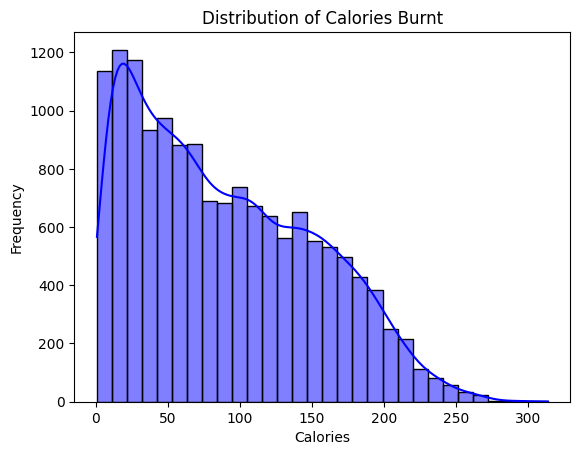

In [138]:
# plotting the distribution of calories
sns.histplot(merged_data['Calories'], kde=True, bins=30, color='blue')
plt.title('Distribution of Calories Burnt')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

### Observation:
* The calorie distribution is positively skewed, with most values between 50–150.

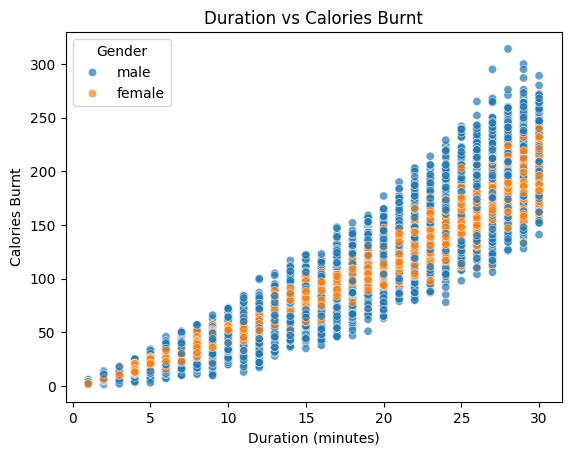

In [139]:
# Scatter plot for Duration vs Calories
sns.scatterplot(x = 'Duration', y = 'Calories', data = merged_data, hue ='Gender', alpha = 0.7)
plt.title('Duration vs Calories Burnt')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories Burnt')
plt.show()

### Observation:
* Calories burnt increase with the duration of exercise.
* Males and females follow similar patterns, but there are gender-specific differences in calorie burn rates.

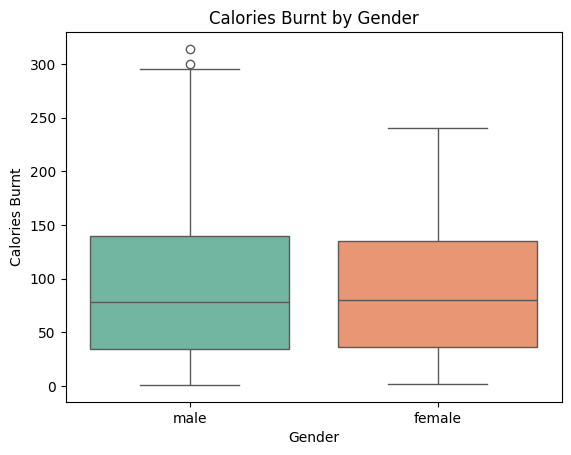

In [140]:
# Boxplot for Gender vs Calories
sns.boxplot(x = 'Gender', y = 'Calories', data = merged_data, palette = 'Set2')
plt.title('Calories Burnt by Gender')
plt.xlabel('Gender')
plt.ylabel('Calories Burnt')
plt.show()

### Observation:
* Males tend to burn more calories than females, possibly due to physiological differences

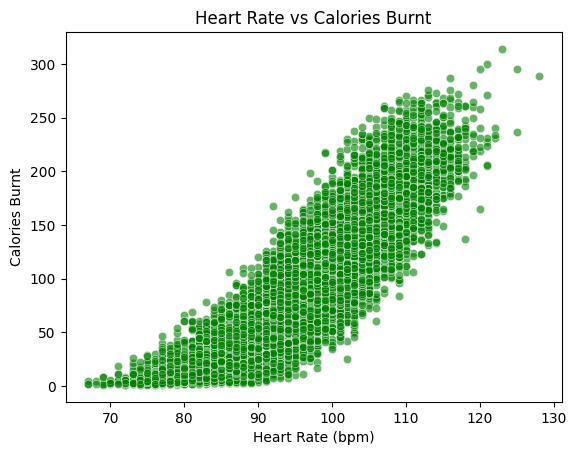

In [141]:
# Scatter plot for Heart Rate vs Calories
sns.scatterplot(x= 'Heart_Rate', y='Calories', data= merged_data, alpha= 0.6, color ='green')
plt.title('Heart Rate vs Calories Burnt')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Calories Burnt')
plt.show()

### Observation:
* Higher heart rates correlate with more calories burnt.

## 4. Feature Engineering

In [142]:
# Adding BMI as a new feature
merged_data['BMI'] = merged_data['Weight'] / ((merged_data['Height'] / 100) ** 2)

In [143]:
# One hot encoding Gender column
data = pd.get_dummies(merged_data, columns=['Gender'], drop_first=True)

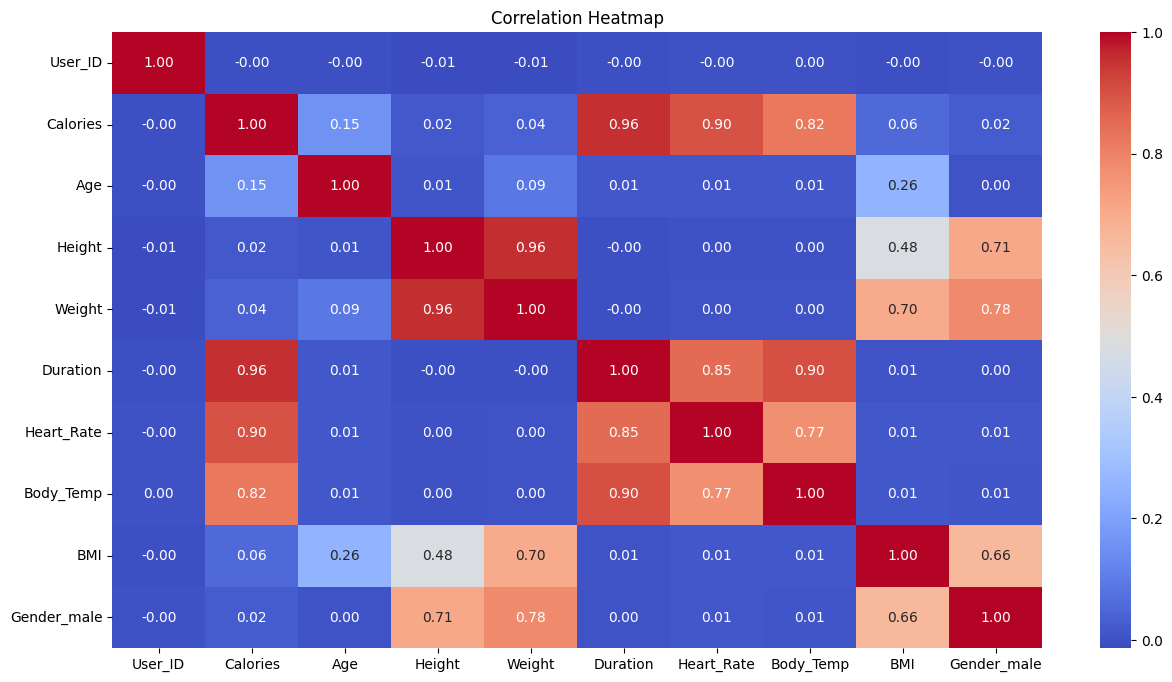

In [144]:
# Correlation analysis
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Observations:
* Duration, Heart Rate, and BMI show strong correlations with calories burnt.
* Body Temperature has a weaker correlation.

## 5. Model Development

In [145]:
# Selecting features and target variable
X = data.drop(columns=['User_ID', 'Calories'])
y = data['Calories']

In [146]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [147]:
# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [148]:
# Training the XGBRegressor model
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## 6. Model Evaluation

In [149]:
# Predictions and Metrics
y_pred = model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 2.187220608654519
MAE: 1.518148379276196
R2 Score: 0.9988146230998822


### Observations:
* RMSE: Indicates the average error in calories burnt prediction.
* R2 Score: Shows the model explains a high variance in the data

## 7. Feature Importance and Residual Analysis

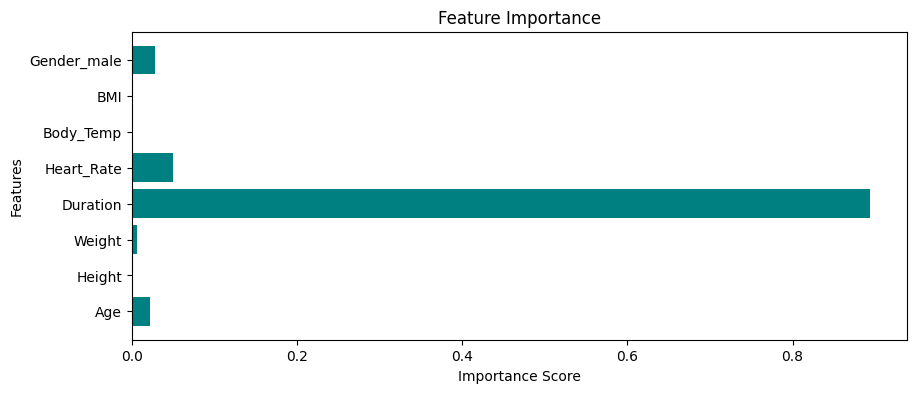

In [150]:
# Feature importance
plt.figure(figsize=(10, 4))
plt.barh(X.columns, model.feature_importances_, color='teal')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

### Observation:
* Duration and Heart Rate are the most influential features.


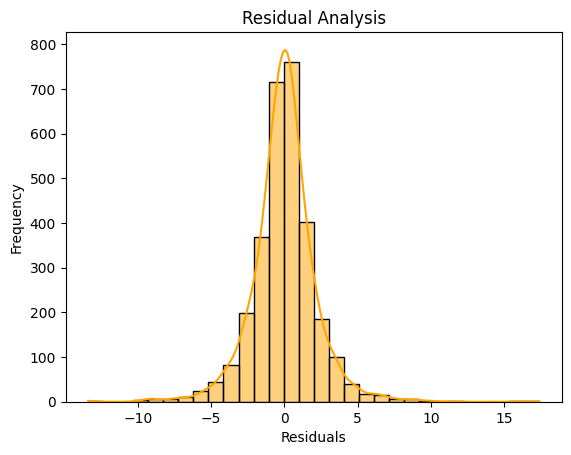

In [151]:
# Residuals analysis
residuals = y_test - y_pred

# Ploting the residuals
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title('Residual Analysis')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Observation:
* Residuals are normally distributed, indicating a good model fit.

## 8. Conclusion and Summary
1. Objective: This project aimed to predict calories burnt during exercise using various features.

2. Key Insights:
     * Duration and heart rate are the strongest predictors of calories burnt.
     * BMI plays a significant role in calorie burn rates.

3. Model Performance:
The XGBoost model achieved strong performance with an R2 score of over 99.88%.